In [264]:
import pandas as panda
from matplotlib import pyplot as plt
from datetime import datetime as dt
import seaborn as sns

In [265]:
ruterData = panda.read_csv("Ruter_data.csv", sep=';')

In [266]:
ruterData = ruterData.rename(columns={'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra': 'Faktisk_Ankomst', 'Passasjerer_Ombord': 'Passasjerer'})

In [267]:
# Filtering to only include arrival time and passernger count
ruterData = ruterData.filter(items=['Faktisk_Ankomst','Passasjerer'])

In [268]:
# Removing all rows with empty arrival time
ruterData = ruterData[ruterData.Faktisk_Ankomst != ':']

In [269]:
# Dividing time into h, m, s
ruterData[['Timer','Minutter','Sekunder']] = ruterData['Faktisk_Ankomst'].str.split(':',expand=True)
ruterData

,Faktisk_Ankomst,Passasjerer,Timer,Minutter,Sekunder
0,10:53:53,5,10,53,53
1,13:12:20,5,13,12,20
2,10:18:56,6,10,18,56
3,13:52:04,10,13,52,04
4,07:34:13,10,07,34,13
...,...,...,...,...,...
5995,16:23:18,2,16,23,18
5996,06:00:32,2,06,00,32
5997,17:42:43,3,17,42,43
5998,06:00:11,5,06,00,11


In [270]:
# Converting 24h and 25h to 00h and 01h
ruterData["Timer"] = panda.to_numeric(ruterData["Timer"])
ruterData["Timer"] = ruterData["Timer"].mod(24)
ruterData.dtypes

Faktisk_Ankomst    object
Passasjerer         int64
Timer               int64
Minutter           object
Sekunder           object
dtype: object

In [271]:
ruterData = ruterData.filter(items=['Timer','Passasjerer'])
ruterData.head()

,Timer,Passasjerer
0,10,5
1,13,5
2,10,6
3,13,10
4,7,10


In [272]:
threshold_max = ruterData['Passasjerer'].quantile(0.99)
threshold_min = ruterData['Passasjerer'].quantile(0.01)
ruterData.shape

(5950, 2)

In [273]:
# Removing rows with outlyers in the passenger column
ruterData = ruterData[(ruterData['Passasjerer'] < threshold_max) & (ruterData['Passasjerer'] > threshold_min)]
ruterData.shape 

(5818, 2)

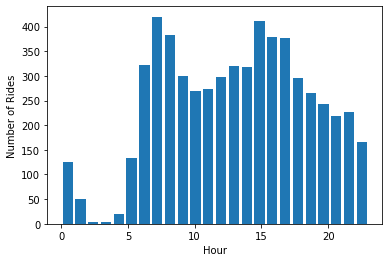

In [274]:
plt.hist(ruterData.Timer, bins=24, rwidth=0.8) 
plt.xlabel('Hour') 
plt.ylabel('Number of Rides') 
plt.show()

In [275]:
ruterData.head()

,Timer,Passasjerer
0,10,5
1,13,5
2,10,6
3,13,10
4,7,10


In [276]:
data = ruterData.groupby(ruterData.Timer).mean()
data

,Passasjerer
Timer,
0,2.642857
1,0.820000
2,0.000000
3,1.000000
4,2.100000
5,2.074627
6,3.229102
7,4.495238
8,4.431937


<AxesSubplot:xlabel='Timer', ylabel='Passasjerer'>

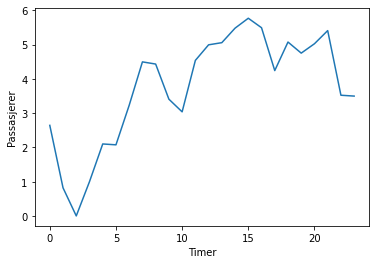

In [277]:
sns.lineplot(x='Timer', y='Passasjerer', data=data)

24

11636